# Исследование объявлений о продаже квартир

## Содержание
1. [Описание проекта](#step1)
2. [Изучение общей информации](#step2)
3. [Предобработка данных](#step3)  
 - Работа с пропущенными значениями  
 - Приведение данных к нужным типам  
 - Расчеты  
4. [Исследовательский анализ даннных](#step4)
 - Изучение пареметров: площадь, цена, число комнат, высота потолков. Работа с аномалиями  
  - Изучение времени продажи квартиры   
  - Исследование факторов, влияющих на стоимость квартиры  
  - Определение населённых пунктов с самой высокой и низкой стоимостью жилья
  - Анализ квартир в центральной зоне  
5. [Общий вывод](#step5)
  
  
 

<a id='step1'></a>

## 1. Описание проекта

**Задача** — установить параметры, влияющие на рыночную стоимость объектов недвижимости, для построения автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность.  

**Данные:**  
Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет сервиса Яндекс.Недвижимость. По каждой квартире доступны два вида данных: первые вписаны пользователем, вторые - получены автоматически на основе картографических данных.  

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  


[К содержанию](#Содержание)
<a id='step2'></a>

## 2. Изучение общей информации

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#Путь к данным:
path = 'datasets/real_estate_data.csv'
data = pd.read_csv(path, sep='\t')
initial_data = data.copy() #создаем копию данных на всякий случай

In [3]:
#проверяем, корректно ли считаны данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id='inf'></a>

In [4]:
#изучаем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что во многих столбцах есть пропущенные значения. В некоторых столбцах логично будет изменить тип данных.  
[Изменение типа данных](#tp)

In [5]:
#посмотрим на сводку из данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Очевидно, в данных есть аномальные значения. Например, стометровые потолки и 19 комнат.   
[Работа с аномалиями](#anm)

[К содержанию](#Содержание)
<a id='step3'></a>

## 3. Предобработка данных

### Работа с пропущенными значениями

Определим и заполним пропущенные значения.

In [6]:
#Посмотрим, в каких столбцах и сколько пропущенных значений и каков их процент от общей выборки.
def missed_table(df):
    missed = df.isnull().sum()
    missed = missed[missed.values != 0] #оставляем только переменные с пропущенными значениями
    missed_percent = (missed/len(df))*100 #считаем процент от общего числа наблюдений
    missed_percent = missed_percent.round(2) #для удобства восприятия округлим проценты до двух знаков после точки
    missed_data = pd.concat([missed, missed_percent], axis=1) #склеили два столбца в общую таблицу
    missed_data.columns = ['всего пропущено', '% от общей выборки']
    missed_data = missed_data.sort_values(by='% от общей выборки', ascending=False)
    return missed_data
missed_table(data)

,всего пропущено,% от общей выборки
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
parks_around3000,5518,23.28
ponds_around3000,5518,23.28
days_exposition,3181,13.42


Больше всего пропущенных значений у переменных parks_nearest и ponds_nearest. Если бы такие данные вводились пользователем, можно было бы предположить, что парки и водоемы находятся настолько далеко, что об этом нет смысла упоминать в объявлении. Но поскольку эти данные получены автоматически на основе картографических данных, скорее всего это техническая ошибка или такие объявления публиковались до того, как была добавлена эта возможность. Можно будет попробовать как-то заполнить эти пропуски на основе переменных parks_around3000 и ponds_around3000, так как у них пропусков меньше, то есть возможно имеются строки, где указано что в радиусе 3000 метров находятся такие объекты, а точное расстояние до них не указано. Также можно посмотреть на строки, где есть информация о расстоянии до парка или пруда, но не указано их количество. 

Для таких переменных, как высота потолка, общее количество этажей, площадь кухни, расстояние до определенных объектов, нет логичной замены для пропущенных значений. Оставим их пока пустыми.

In [7]:
data.loc[data['parks_nearest']<=3000, 'parks_around3000'].isna().sum()

0

Мы убедились, что нет записей, у которых расстояние до парка было бы меньше  3000 м, а переменная parks_around3000 пропущена.

In [8]:
data[data['parks_around3000'].isna()]['parks_nearest'].isna().sum()

5518

Более того, у всех записей, не где пропущена parks_around3000, parks_nearest также пропущена.

In [9]:
data.loc[~data['parks_around3000'].isna()][['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest
0,1.0,482.0
1,0.0,NaN
2,1.0,90.0
3,2.0,84.0
4,2.0,112.0
...,...,...
23690,1.0,300.0
23691,0.0,NaN
23693,1.0,352.0
23694,1.0,796.0


В таблице видно, что иногда при пропуске parks_nearest, значения parks_around3000 заменены на нули, так что поступим так же с остальными пропусками в данной переменной.

In [10]:
data['parks_around3000'].fillna(0, inplace=True)

In [11]:
data.loc[data['ponds_nearest']<=3000, 'ponds_around3000'].isna().sum()

0

In [12]:
data[data['ponds_around3000'].isna()]['ponds_nearest'].isna().sum()

5518

In [13]:
data.loc[~data['ponds_around3000'].isna()][['ponds_around3000', 'ponds_nearest']]

,ponds_around3000,ponds_nearest
0,2.0,755.0
1,0.0,NaN
2,2.0,574.0
3,3.0,234.0
4,1.0,48.0
...,...,...
23690,0.0,NaN
23691,1.0,806.0
23693,1.0,675.0
23694,3.0,381.0


In [14]:
data['ponds_around3000'].fillna(0, inplace=True)

Пустые значения переменной balcony можно заменить на 0 в предположении, что если не указано количество балконов, значит их нет.

In [15]:
data['balcony'].fillna(0, inplace=True)

In [16]:
data['balcony'].isna().sum()

0

Пустые значения переменной is_apartment можно заменить на False в предположении, что если такая информация не указана дополнительно, значит она не актуальна для данного объявления, и это обычная квартира.

In [17]:
data['is_apartment'].fillna(False, inplace=True)

In [18]:
data['is_apartment'].isna().sum()

0

Пропущенные значения переменной days_exposition возможно связаны с тем, что на момент выгрузки данных эти квартиры еще не были проданы. Тогда логично оставить эти пропуски пустыми. Замена на какое-либо значение, например, на разницу между какой-то фиксированной датой и датой публикации объявления, сильно исказит распределение переменной.

Пропущенные значения переменной locality_name и floors_total составляют меньше процента от выборки, так что их можно удалить. 

In [19]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True )

In [20]:
#посмотрим на таблицу с пропущенными значениями после всех преобразований
missed_table(data)

,всего пропущено,% от общей выборки
parks_nearest,15535,65.92
ponds_nearest,14529,61.65
ceiling_height,9084,38.55
airports_nearest,5524,23.44
cityCenters_nearest,5501,23.34
days_exposition,3171,13.46
kitchen_area,2222,9.43
living_area,1865,7.91


Проверим данные на наличие грубых дубликатов:

In [21]:
data.duplicated().sum()

0

In [22]:
#Попробуем проверить, нет ли дубликатов в значениях переменной locality_name,
#связанных с разным написанием одного и того же населенного пункта
data['locality_name'].value_counts()

Санкт-Петербург           15651
посёлок Мурино              520
посёлок Шушары              439
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Дружноселье           1
поселок Сумино                1
поселок Почап                 1
деревня Борисова Грива        1
деревня Котлы                 1
Name: locality_name, Length: 364, dtype: int64

Отдельных населенных пунктов очень много, и дубликаты найти будет сложно, но уже видно, что есть проблема с разным написанием слова "посёлок"

In [23]:
#Заменяем "поселок" на "посёлок"
data['locality_name'] = data['locality_name'].apply(lambda s: s.replace('поселок', 'посёлок'))

In [24]:
data['locality_name'].value_counts()

Санкт-Петербург                     15651
посёлок Мурино                        552
посёлок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
деревня Борисова Грива                  1
посёлок Белоостров                      1
деревня Щеглово                         1
садовое товарищество Новая Ропша        1
деревня Котлы                           1
Name: locality_name, Length: 330, dtype: int64

## Вывод

Пропущенные значения были обработаны следующим образом:  
 - отсутствующие значения parks_around3000 и parks_around3000 заменены нулями
 - в locality_name и floors_total - удалены, так как составляют даже в сумме меньше процента от общего числа наблюдений. 
 - в balcony заменены на 0 в предположении, что если не указано количество балконов, значит их нет  
 - в is_apartment заменены на False в предположении, что если такая информация не указана дополнительно, значит она не актуальна для данного объявления    
 - для остальных переменных пропущенные значения оставлены  
 
Грубых дубликатов в данных не обнаружено.  
В столбце с названиями населенных пунктов решена проблема с разным написанием слова и "посёлок".
 

<a id='tp'></a>

### Приведение данных к нужным типам

[В таблице с общей информацией](#inf) об используемых данных видно, что некоторые переменные имеют не логичный для них тип:

In [25]:
#преобразуем переменную first_day_exposition в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
#переменные, которые отражают количество чего-либо, логично перевести в целочисленный тип
q_vars = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']
for var in q_vars:
    data[var] = data[var].astype('int', errors='ignore')

In [27]:
#переменную is_apartment преобразуем в логический тип
data['is_apartment'] = data['is_apartment'].astype('bool')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

## Вывод
Тип данных изменён у следующих переменных:  
- first_day_exposition - c object на datetime
- floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - с float на int 
- is_apartment - c object на bool

## Расчеты

In [29]:
#Рассчитаем цену квадратного метра:
data['price_per_m2'] = (data['last_price']/data['living_area']).round(2)

In [30]:
#Определим день недели, месяц и год публикации объявления:
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [31]:
#Разделим квартиры на категории по признаку этажа: первый, последний, другой
def floor_cat(row):
    if row['floor']==1:
        return 'first'
    if row['floor']==row['floors_total']:
        return 'last'
    return 'other' 

In [32]:
data['floor_cat'] = data.apply(floor_cat, axis=1)

In [33]:
#Рассчитаем соотношения: жилая/общая площадь и площадь кухни/общая площадь
data['living_area_ratio'] = (data['living_area']/data['total_area']).round(2)
data['kitchen_area_ratio'] = (data['kitchen_area']/data['total_area']).round(2)

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,254901.96,3,3,2019,other,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0,NaN,81.0,180107.53,1,12,2018,first,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2,574.0,558.0,151486.88,3,8,2015,other,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424.0,NaN,4,7,2015,other,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,312500.00,1,6,2018,other,0.32,0.41


[К содержанию](#Содержание)
<a id='step4'></a>

## Вывод  
Рассчитаны и добавлены в таблицу следующие переменные:  
- price_per_m2 - цена квадратного метра
- weekday_exposition, month_exposition, year_exposition - день недели, месяц и год публикации объявления соответственно  
- floor_cat - категория квартиры по признаку этажа  
- iving_area_ratio - отношение жилой площади квартиры к её общей площади  
- kitchen_area_ratio - отношение площади кухни квартиры к её общей площади

## 4. Исследовательский анализ даннных

[К содержанию](#Содержание)
<a id='step5'></a>

### Изучение пареметров: площадь, цена, число комнат, высота потолков. Работа с аномалиями

<a id='anm'></a>

In [35]:
params = {'total_area':'Общая площадь, м2', 'last_price':'Цена, р.', 'rooms':'Количество комнат', 'ceiling_height':'Высота потолка, м.'}
slice1 = data[params.keys()]
#изучим подробнее сводку именно по этим данным
slice1.describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,14481.000000
mean,60.322824,6.540058e+06,2.070656,2.771283
std,35.657060,1.091093e+07,1.078591,1.261983
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.510000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


По данным таблицы видно, что есть значения, не соответствующие действительности. 900 квадратных метров, либо потолки в 100 м это слишком даже для элитной недвижимости. Сразу удалим такие строки.

In [36]:
data.drop(data[data['total_area'] == 900].index, inplace=True)
data.drop(data[data['ceiling_height'] == 100].index, inplace=True)

Также вызывают сильное сомнение квартиры с нулевым количеством комнат и метровыми потолками. Посмотрим на такие данные.

Можно было бы предположить, что нулевое количество комнат указывается у квартир-студий:

In [37]:
data.query('rooms == 0').studio.unique()

array([ True, False])

Но поскольку такие квартиры могут быть как студиями, так и обычными квартирами, предположение неверно. Удалим такие значения.

In [38]:
data.drop(data[data['rooms'] == 0].index, inplace=True)

По информации из Интернета, минимальная высота потолка в жилых помещениях определяется СНиП как 2.5 м

In [39]:
data.query('ceiling_height < 2.5').shape

(73, 29)

Исключим такие данные

In [40]:
data.drop(data[data['ceiling_height'] < 2.5].index, inplace=True)

Подозрительно выглядит и минимальная цена :

In [41]:
slice1.describe().loc['min', 'last_price']

12190.0

Поиск в Интернете показал, что самая дешевая квартира в ленинградской обласли в 2020 году стоит 280000 р. Думаю, целесообразно исключить из анализа квартиры стоимостью менее 300000 р.

In [42]:
data.drop(data[data['last_price'] <= 300000.0].index, inplace=True)

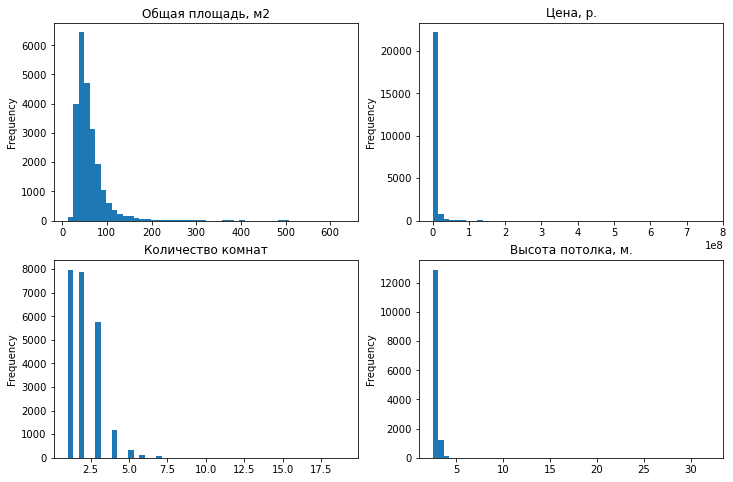

In [43]:
#Посмотрим на гистограммы рассматриваемых параметров
def draw_hists():
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    for i in range(len(params)):
        data.plot(y=list(params.keys())[i], kind='hist', bins=50, ax=axes[i//2,i%2], legend=False)
        axes[i//2, i%2].set_title(params[list(params.keys())[i]])
draw_hists()

По гистограммам видно, что остаётся еще очень много редких значений. Нужен дополнительный анализ. Построим коробчатые диаграммы рассматриваемых параметров. 

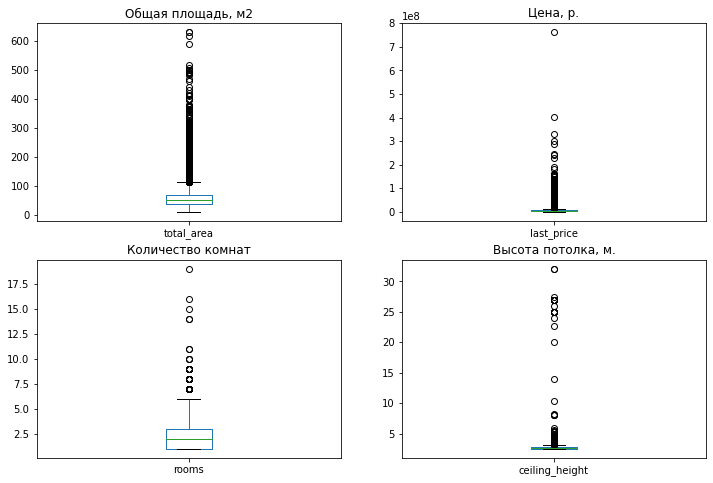

In [44]:
def draw_boxes():
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    for i in range(len(params)):
        data.plot(y=list(params.keys())[i], kind='box', ax=axes[i//2,i%2], legend=False)
        axes[i//2, i%2].set_title(params[list(params.keys())[i]])
draw_boxes()

Переменные имеют очень много выбросов. Рассмотрим их подробнее. Посчитаем для каждого параметра количество выбросов и и х долю от общего числа набюдений.

In [45]:
#площадь
print('Переменная Общая площадь имеет {} выбросов, что составляет {:.2%} от общей выборки'.format(
    data.query('total_area > 150').shape[0], data.query('total_area > 150').shape[0]/data.shape[0]))

Переменная Общая площадь имеет 559 выбросов, что составляет 2.40% от общей выборки


In [46]:
data.query('total_area > 150').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424.0,NaN,4,7,2015,other,NaN,NaN
42,13,22000000.0,161.8,2015-07-08,4,2.80,4,80.90,2,False,...,1,907.0,987.0,271940.67,2,7,2015,other,0.50,0.11
51,7,45000000.0,161.0,2017-10-17,3,3.20,8,38.00,4,False,...,3,99.0,541.0,1184210.53,1,10,2017,other,0.24,0.31
121,20,33000000.0,180.0,2017-02-17,3,2.90,9,86.00,8,False,...,0,NaN,144.0,383720.93,4,2,2017,other,0.48,0.13
147,10,27700000.0,179.6,2017-07-06,5,2.85,25,97.20,25,False,...,1,806.0,75.0,284979.42,3,7,2017,last,0.54,0.19
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.00,3,False,...,3,366.0,62.0,524590.16,4,7,2017,last,0.58,NaN
177,3,21042018.0,154.9,2017-09-10,4,3.30,16,89.11,3,False,...,2,427.0,563.0,236135.32,6,9,2017,other,0.58,0.14
178,18,16300000.0,153.0,2019-03-30,4,2.71,10,89.40,10,False,...,2,346.0,NaN,182326.62,5,3,2019,last,0.58,NaN
262,14,37500000.0,158.0,2019-01-24,4,NaN,12,88.00,4,False,...,2,840.0,NaN,426136.36,3,1,2019,other,0.56,0.25
335,1,21800000.0,163.4,2017-12-10,5,3.50,5,119.50,2,False,...,0,NaN,106.0,182426.78,6,12,2017,other,0.73,0.06


В целом, данные выглядят правдоподобно, но это все-таки скорее всего какая-то элитная недвижимость, которую нужно анализировать отдельно. К тому же данные составляют всего 2.38% от выборки, так что избавимся от них.

In [47]:
data = data.query('total_area <= 150')

Цена. На коробчатой диаграмме видно, что после где-то 20 млн р значения становятся значительно реже. 
Выберем такую границу

In [48]:
print('Переменная Цена имеет {} выбросов, что составляет {:.2%} от общей выборки'.format(
    data.query('last_price > 20000000').shape[0], data.query('last_price > 20000000').shape[0]/data.shape[0]))

Переменная Цена имеет 332 выбросов, что составляет 1.46% от общей выборки


In [49]:
data = data.query('last_price <= 20000000')

Количество комнат больше шести выглядит маловероятным

In [50]:
print('Переменная Количество комнат имеет {} выбросов, что составляет {:.2%} от общей выборки'.format(
    data.query('rooms > 6').shape[0], data.query('rooms > 6').shape[0]/data.shape[0]))

Переменная Количество комнат имеет 6 выбросов, что составляет 0.03% от общей выборки


In [51]:
data = data.query('rooms <= 6')

Высота потолка. Сложно представить себе потолки в городских квартирах выше 4 м.

In [52]:
print('Переменная Высота потолков имеет {} выбросов, что составляет {:.2%} от общей выборки'.format(
    data.query('ceiling_height > 6').shape[0], data.query('ceiling_height > 6').shape[0]/data.shape[0]))

Переменная Высота потолков имеет 27 выбросов, что составляет 0.12% от общей выборки


In [53]:
data = data.query('ceiling_height <= 4')

 Посмотрим на графики после удаления аномалий.

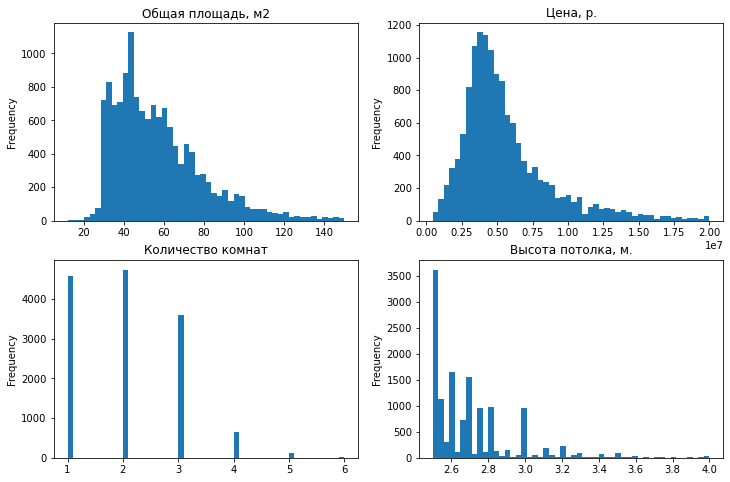

In [54]:
draw_hists()

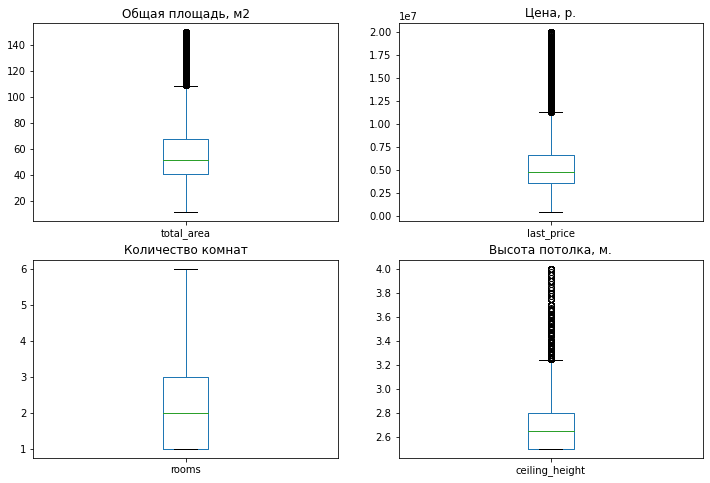

In [55]:
draw_boxes()

Графики выглядят гораздо лучше. Гистограммы становятся больше похожи на нормальное распределение.

## Вывод  
Были признаны аномалиями и исключены из анализа следующие квартиры:  
 - площадью более 150 кв. м.
 - с количеством комнат 0 или более 6. 
 - с высотой потолка менее 2.5 м или более 4 м.  
 - стоимостью менее 300000 р. или более 20000000 р.


### Изучение времени продажи квартиры

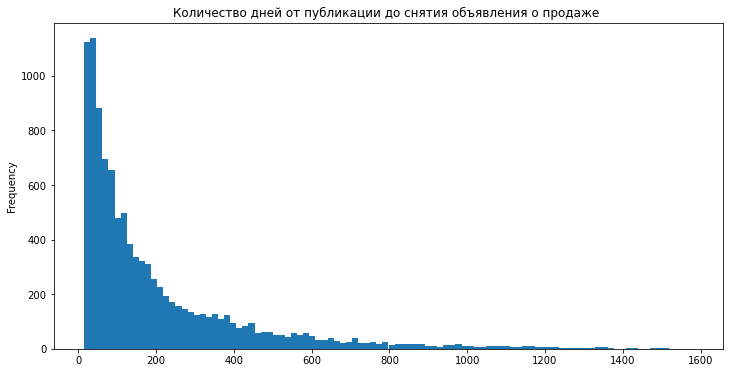

In [116]:
#построим гистограмму переменной days_exposition - количества дней от публикации до снятия объявления
data.plot(y='days_exposition', kind='hist', bins=100, legend=False, 
         figsize=(12,6))
plt.title('Количество дней от публикации до снятия объявления о продаже ');

На гистограмме виден отчетливый пик около нуля. Но из-за мастштаба сложно сказать, являются ли эти данные не реалистичными.
Посмотрим также на сводку данных.

In [57]:
days_exp_desc = data['days_exposition'].describe()
days_exp_desc

count    11418.000000
mean       186.254248
std        225.043884
min          1.000000
25%         45.000000
50%        100.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [58]:
print('Максимальное значение времени продажи квартиры в годах: {:.2f}'.format(1580/365))

Максимальное значение времени продажи квартиры в годах: 4.33


Максимальное значение 1580 дней кажется нормальным. Думаю, вполне возможно, что некоторые квартиры продаются годами. Это может объясняться завышенной ценой, неудобным расположением, плохим ремонтом и рядом других реальных причин. Минимальное значение в один день кажется неправдоподобным. Поиск в Интернете показал, что в среднем квартиру реально продать за 1 месяц. Посмотрим, сколько квартир в наших данных продавались меньше 30 дней.

In [59]:
print('Процент квартир, которые были проданы менее чем за месяц : {:.2%}'.format(data[data['days_exposition'] <= 30].shape[0]/data.shape[0]))

Процент квартир, которые были проданы менее чем за месяц : 15.61%


15% выборки - довольно много. Предположим, что если продавать квартиру по минимально приемлемой цене, можно сократить срок до двух недель.

In [60]:
print('Процент квартир, которые были проданы менее чем за две недели: {:.2%}'.format(data[data['days_exposition'] <= 14].shape[0]/data.shape[0]))

Процент квартир, которые были проданы менее чем за две недели: 7.37%


Предположим, что если объявление было снято меньше, чем через две недели после публикации, люди или передумали продавать недвижимость, или решили воспользоваться другими сервисами, и удалим такие данные.

In [61]:
data = data.query('days_exposition > 14')

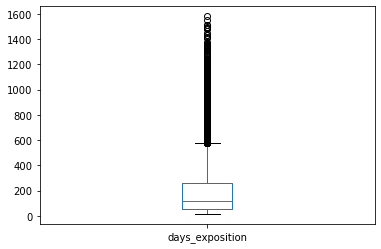

In [62]:
data.plot(y='days_exposition', kind='box');

Необычно долгими можно считать продажи, которые продолжались более 600 дней. Но поскольку на рынке недвижимости такая ситуация вполне возможна, оставим эти данные как есть.

In [63]:
#Среднее время продажи квартиры было посчитано ранее в сводке:
print('Среднее время продажи квартиры: {} дней'.format(int(days_exp_desc['mean'])))

#Но поскольку по графикам видно, что распределение переменной сильно скошено, к тому же были оставлены
#пропущенные значения, более подходящей оценкой типичного времени продажи будет медиана:
print('Медианное время продажи квартиры: {} дней'.format(int(data.days_exposition.median())))

Среднее время продажи квартиры: 186 дней
Медианное время продажи квартиры: 116 дней


## Выводы
Были признаны неправдоподобными и исключены из рассмотрения данные с временем продажи квартиры менее 14 дней.

### Исследование факторов, влияющих на стоимость квартиры

Рассмотрим зависимость стоимости квартиры от следующих факторов: площадь, число комнат, удаленность от центра. Для этого построим диаграммы рассеяния и посчитаем корреляции.  

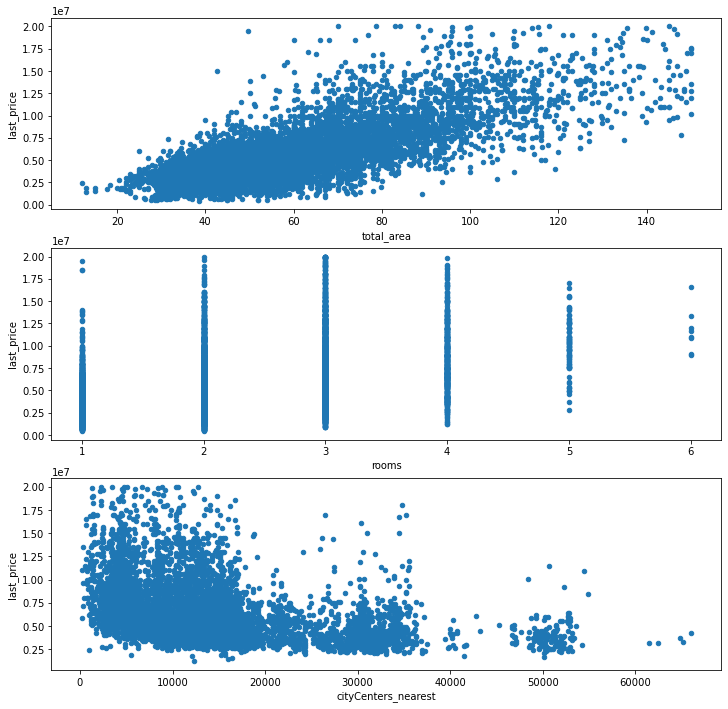

In [64]:
xs = ['total_area', 'rooms', 'cityCenters_nearest']
fig, axes = plt.subplots(3, 1, figsize=(12,12))
for i in range(3):
    data.plot(x=xs[i], y='last_price', kind='scatter', ax=axes[i])
        

В целом, отчетливая связь видна между ценой и площадью.  
С увеличением количества комнат растёт скорее минимальная цена.  
С увеличением расстояния от центра снижается разброс значений.

In [65]:
#Посмотрим на корреляции
corr_df = pd.DataFrame([data['last_price'].corr(data[x]) for x in xs], index=xs)
corr_df.columns = ['Коэффициент корреляции между ценой и переменной']
corr_df.round(2)    

,Коэффициент корреляции между ценой и переменной
total_area,0.77
rooms,0.48
cityCenters_nearest,-0.36


Вычисленные коэффициенты подтверждают информацию, полученную по графикам. Достаточно сильная взаимосвязь между ценой площадью и более слабая между ценой и количеством комнат и расстоянием от центра. Отрицательное значение последнего логично: чем больше расстояние от центра, тем ниже должна быть при прочих равных условиях цена.

Рассмотрим также влияние на цену соотношения жилой площади к общей и площади кухни к общей.

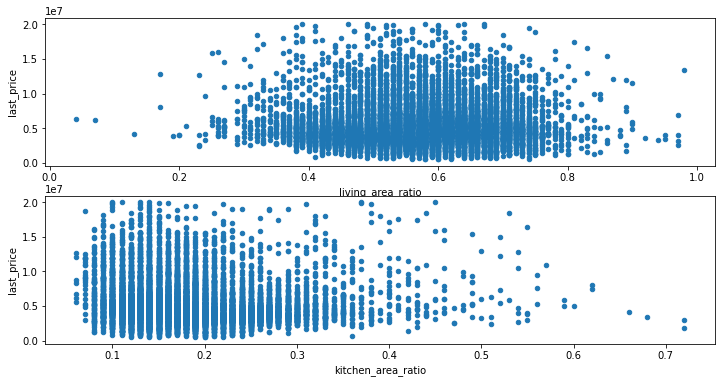

In [66]:
xs = ['living_area_ratio', 'kitchen_area_ratio']
fig, axes = plt.subplots(2, 1, figsize=(12,6))
for i in range(2):
    data.plot(x=xs[i], y='last_price', kind='scatter', ax=axes[i])

In [67]:
corr_df = pd.DataFrame([data['last_price'].corr(data[x]) for x in xs], index=xs)
corr_df.columns = ['Коэффициент корреляции между ценой и переменной']
corr_df.round(2)

,Коэффициент корреляции между ценой и переменной
living_area_ratio,0.02
kitchen_area_ratio,-0.09


И графики и вычисленные коэффициенты корреляции говорят о том, что между соотношениями площадей жилая/общая и кухня/общая и ценой нет взаимосвязи.

Сгруппируем квартиры по количеству комнат.

In [68]:
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['min','median','max'])
pivot_rooms.columns = ['Минимальная цена', 'Медианная цена', 'Максимальная цена']
pivot_rooms

,Минимальная цена,Медианная цена,Максимальная цена
rooms,,,
1,490000.0,3600000.0,19500000.0
2,450000.0,4790000.0,20000000.0
3,850000.0,6000000.0,20000000.0
4,1200000.0,7600000.0,19800000.0
5,2850000.0,10200000.0,17000000.0
6,9000000.0,11350000.0,16550000.0


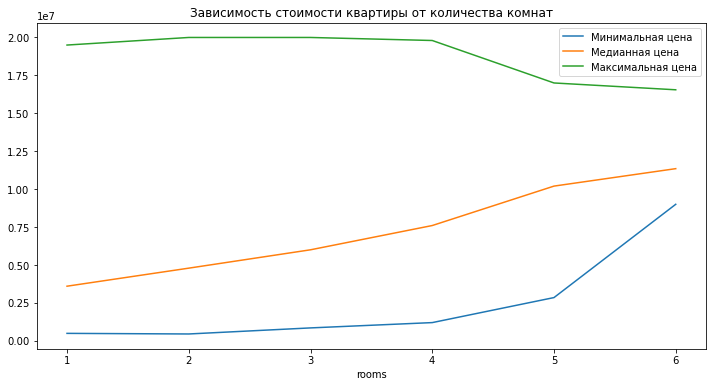

In [117]:
pivot_rooms.plot(figsize=(12,6))
plt.title('Зависимость стоимости квартиры от количества комнат');

Медианная цена квартиры растет с увеличением числа комнат. При этом минимальная и максимальная цена у квартир до четырех комнат изменяются слабо, а у квартир, имеющих более четырёх комнат минимальная цена резко возрастает, а максимальная, наоборот, снижается. 

Рассмотрим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [70]:
pivot_floor = data.pivot_table(columns='floor_cat', values='last_price', index='rooms', aggfunc='median')
pivot_floor

floor_cat,first,last,other
rooms,,,
1,3000000.0,3295000.0,3700000.0
2,3850000.0,4200000.0,5100000.0
3,5075000.0,5800000.0,6300000.0
4,6200000.0,7395000.0,8400000.0
5,9200000.0,9500000.0,10550000.0
6,13351000.0,9050000.0,11700000.0


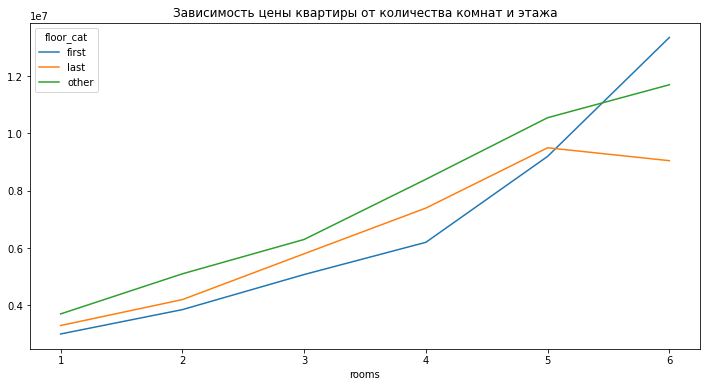

In [118]:
pivot_floor.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры от количества комнат и этажа');

В целом, видно, что квартиры на первом и последнеем этажах стоят как правило дешевле. Эта зависимость перестает соблюдаться только для больших квартир - более 5 комнат.

Рассмотрим зависимость цены от даты размещения объявления: дня недели, месяца и года.

In [72]:
pivot_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
pivot_weekday

,last_price
weekday_exposition,
0,4600000.0
1,4800000.0
2,4590000.0
3,4650000.0
4,4515000.0
5,4555000.0
6,4530000.0


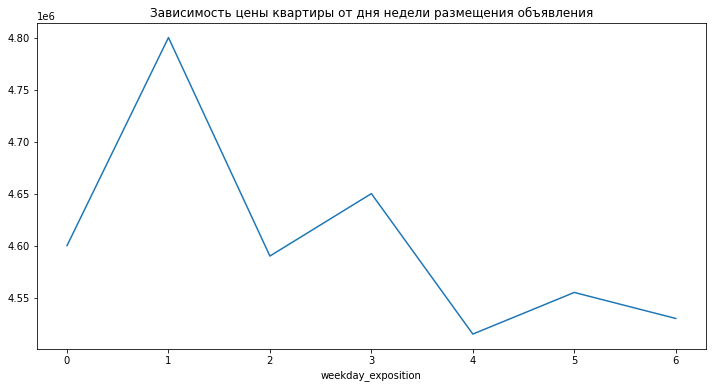

In [120]:
pivot_weekday.plot(legend=False, figsize=(12,6))
plt.title('Зависимость цены квартиры от дня недели размещения объявления');

Объявления о продаже более дорогих квартир размещают в понедельник. Объявления с минимальной ценой публикуются в четверг.

In [74]:
pivot_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
pivot_month

,last_price
month_exposition,
1,4600000.0
2,4700000.0
3,4475000.0
4,4650000.0
5,4687500.0
6,4500000.0
7,4690000.0
8,4680000.0
9,4790000.0


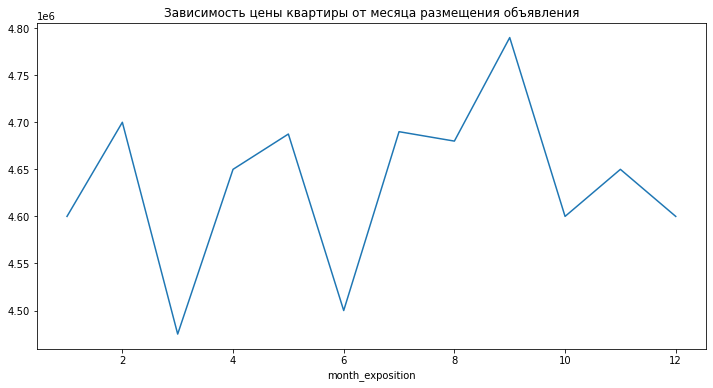

In [121]:
pivot_month.plot(legend=False, figsize=(12,6))
plt.title('Зависимость цены квартиры от месяца размещения объявления');

В сентябре публикуют объявления о продаже более дорогих квартир, в марте - наиболее дешёвых.

In [76]:
pivot_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
pivot_year

,last_price
year_exposition,
2014,6595000.0
2015,5257500.0
2016,4750000.0
2017,4550000.0
2018,4550000.0
2019,4850000.0


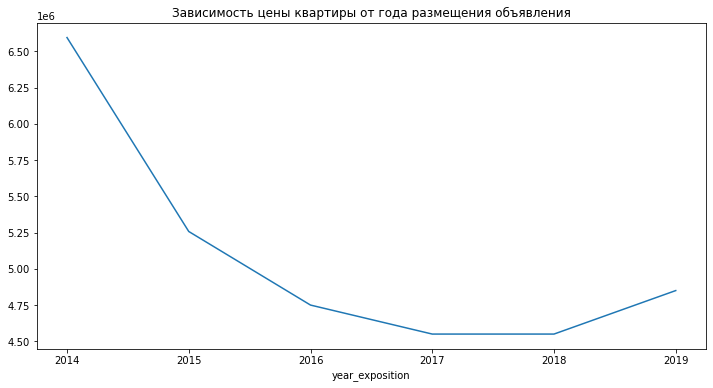

In [122]:
pivot_year.plot(legend=False, figsize=(12,6))
plt.title('Зависимость цены квартиры от года размещения объявления');

До 2018 года медианная цена квартир снижалась, к 2019 году наблюдается небольшой рост.

## Вывод
В большей степени цена квартиры зависит от общей площади. Определенный вклад вносят количество комнат и удаленность от центра. 
Также выявлена зависимость цены квартир от дня недели, месяца и года публикации объявления о продаже.

### Определение населённых пунктов с самой высокой и низкой стоимостью жилья

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [78]:
top10_loc = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
top10_loc

Санкт-Петербург      7105
Всеволожск            207
посёлок Мурино        196
посёлок Шушары        176
Пушкин                163
Колпино               160
Петергоф              117
Гатчина               111
посёлок Парголово     104
Сестрорецк            103
Name: locality_name, dtype: int64

In [79]:
top10 = top10_loc.index.values

In [80]:
top10_data = data.query('locality_name in @top10')

In [81]:
#рассчитываем среднюю цену квадратного метра в этих населенных пунктах
top10_grouped = top10_data.groupby('locality_name')['price_per_m2'].median()
top10_grouped.sort_values(ascending=False).round(2)

locality_name
посёлок Парголово    196609.20
Санкт-Петербург      182758.62
Сестрорецк           179194.52
посёлок Мурино       177083.34
Пушкин               174140.44
Петергоф             140957.45
посёлок Шушары       138990.38
Колпино              125278.64
Всеволожск           123134.22
Гатчина              113710.82
Name: price_per_m2, dtype: float64

Самая высокая стоимость жилья среди населённых пунктов с наибольшим числом объявлений в посёлке Парголово. Самая низкая - в Гатчине.  
Хотя в Санкт-Петербурге количество объявлений гораздо больше и его следует рассмотреть отдельно.

### Анализ квартир в центральной зоне

In [82]:
#выберем объявления только из Санкт-Петербурга
spb_data = pd.DataFrame(data.query('locality_name == "Санкт-Петербург"'))
spb_data.shape

(7105, 29)

In [83]:
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest']/1000

In [84]:
#избавимся от строк с отсутствующим расстоянием до центра
spb_data = spb_data[spb_data['cityCenters_nearest_km'].notnull()]

In [85]:
#округляем расстояние до центра в километрах до целых значений
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')

In [86]:
#Считаем среднюю цену для каждого километра
km_grouped = spb_data.groupby('cityCenters_nearest_km')['last_price'].median()

<a id=km></a>

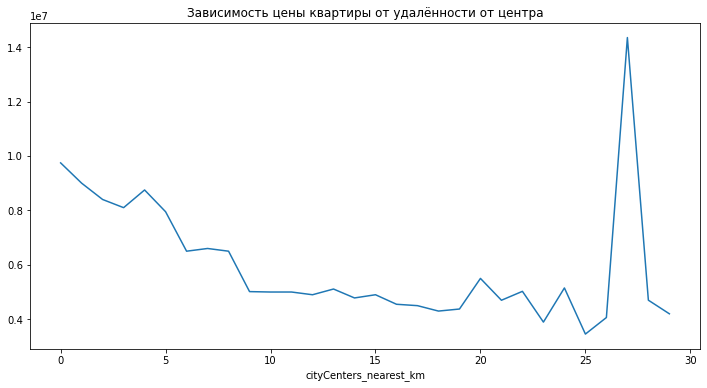

In [123]:
#построим график зависимости медианной цены от удаленности от центра
km_grouped.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры от удалённости от центра');

График,если не считать всплеска на 27 км, меняется в районе 10 км - определим 10 км в качестве границы центральной зоны.

In [88]:
#на самом деле "всплеск" - это одна довольно дорогая квартира:
spb_data.query('cityCenters_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128.0,478333.33,1,11,2017,other,0.41,0.34,27


In [89]:
#выделяем центральную зону:
spb_center_data = spb_data[spb_data['cityCenters_nearest_km']<=10]

Сравним следующие параметры: площадь, цена, число комнат, высота потолков для центральной зоны и для города в целом.

In [90]:
#Санкт-Петербург в целом
spb_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,7096.000000,7.096000e+03,7096.000000,7096.000000
mean,58.616683,6.307784e+06,2.092446,2.731653
std,23.065969,3.076190e+06,0.955925,0.252405
min,12.000000,1.200000e+06,1.000000,2.500000
25%,41.900000,4.200000e+06,1.000000,2.550000
50%,53.900000,5.320000e+06,2.000000,2.665000
75%,70.300000,7.490000e+06,3.000000,2.800000
max,150.000000,2.000000e+07,6.000000,4.000000


In [91]:
#Центральная зона
spb_center_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2519.000000,2.519000e+03,2519.000000,2519.000000
mean,66.860532,7.793530e+06,2.335848,2.891382
std,26.616592,3.620042e+06,1.018080,0.318445
min,12.000000,1.850000e+06,1.000000,2.500000
25%,45.695000,5.000000e+06,2.000000,2.600000
50%,62.000000,6.900000e+06,2.000000,2.810000
75%,83.000000,9.767500e+06,3.000000,3.100000
max,150.000000,2.000000e+07,6.000000,4.000000


В центре квартиры ожидаемо дороже, а также в среднем больше по площади.

Рассмотрим факторы, влияющие на цену: число комнат, этаж, удаленность от центра, дата размещения объявления

In [92]:
spb_pivot_rooms = spb_data.pivot_table(index='rooms', values='last_price', aggfunc=['min','median','max'])
spb_pivot_rooms.columns = ['Минимальная цена', 'Медианная цена', 'Максимальная цена']
spb_pivot_rooms

,Минимальная цена,Медианная цена,Максимальная цена
rooms,,,
1,1400000.0,4050000.0,19500000.0
2,1900000.0,5500000.0,20000000.0
3,2900000.0,6800000.0,20000000.0
4,1200000.0,8500000.0,19800000.0
5,4900000.0,10475000.0,17000000.0
6,9000000.0,11350000.0,16550000.0


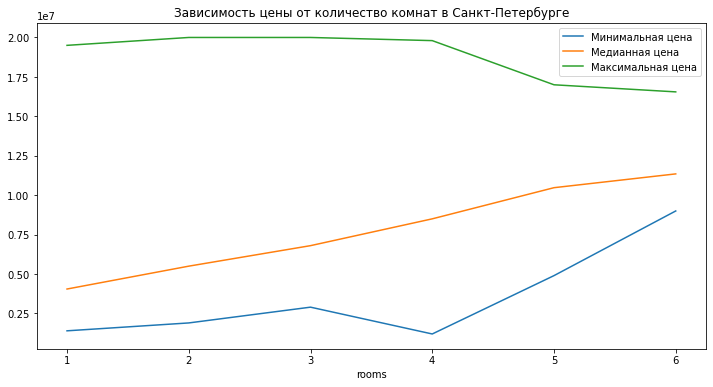

In [124]:
spb_pivot_rooms.plot(figsize=(12,6))
plt.title('Зависимость цены от количество комнат в Санкт-Петербурге');

In [94]:
spb_center_pivot_rooms = spb_center_data.pivot_table(index='rooms', values='last_price', aggfunc=['min','median','max'])
spb_center_pivot_rooms.columns = ['Минимальная цена', 'Медианная цена', 'Максимальная цена']
spb_center_pivot_rooms

,Минимальная цена,Медианная цена,Максимальная цена
rooms,,,
1,1850000.0,4670000.0,19500000.0
2,3100000.0,6499999.5,20000000.0
3,3300000.0,8400000.0,20000000.0
4,3550000.0,9900000.0,19800000.0
5,5250000.0,10800000.0,17000000.0
6,9100000.0,11700000.0,16550000.0


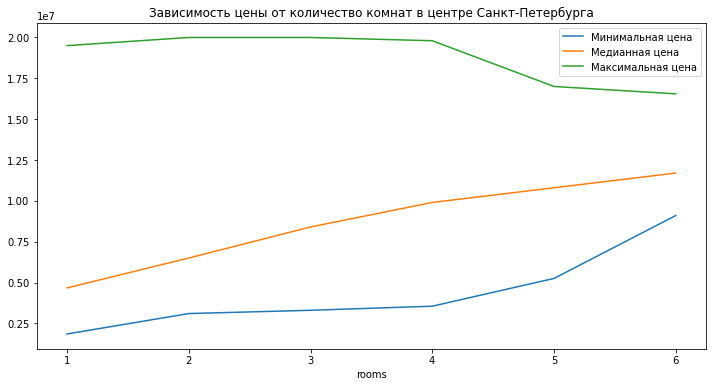

In [125]:
spb_center_pivot_rooms.plot(figsize=(12,6))
plt.title('Зависимость цены от количество комнат в центре Санкт-Петербурга');

Зависимость цены от числа комнат как в центре, так и в целом по городу и в регионе одинакова: медианная и минимальная цены растут, максимальная изменяется слабо, у квартир с большим числом комнат снижается.

Рассмотрим влияние этажа на цену.

In [96]:
spb_pivot_floor = spb_data.pivot_table(columns='floor_cat', values='last_price', index='rooms', aggfunc='median')
spb_pivot_floor

floor_cat,first,last,other
rooms,,,
1,3400000.0,3900000.0,4150000.0
2,4550000.0,5175000.0,5766000.0
3,5750000.0,7200000.0,7000000.0
4,6500000.0,9000000.0,8975000.0
5,9200000.0,10000000.0,10800000.0
6,13351000.0,9050000.0,11700000.0


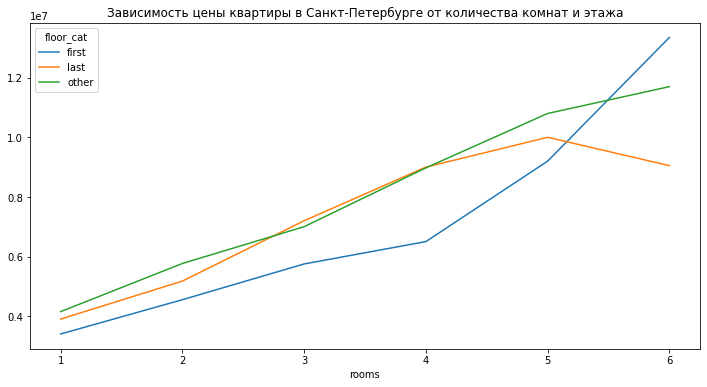

In [126]:
spb_pivot_floor.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры в Санкт-Петербурге от количества комнат и этажа');

In [98]:
spb_center_pivot_floor = spb_center_data.pivot_table(columns='floor_cat', values='last_price', index='rooms', aggfunc='median')
spb_center_pivot_floor

floor_cat,first,last,other
rooms,,,
1,3900000.0,4200000.0,4900000.0
2,5150000.0,6200000.0,6800000.0
3,6750000.0,8200000.0,8850000.0
4,7875000.0,10400000.0,9900000.0
5,9925000.0,10100000.0,11000000.0
6,13351000.0,9100000.0,11700000.0


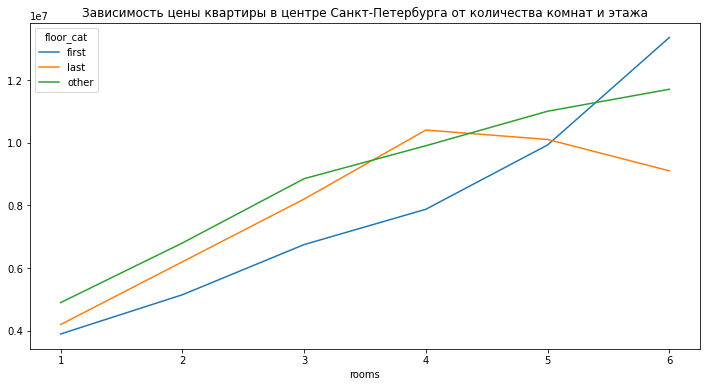

In [127]:
spb_center_pivot_floor.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры в центре Санкт-Петербурга от количества комнат и этажа');

Для небольших квартир зависимость от этажа примерно такая же, как и по региону в целом. Хотя в центре разница между ценой на последнем этаже и на других этажах выражена меньше.

Рассмотрим влияние удаленности от центра на цену в городе в целом и в центральной зоне.

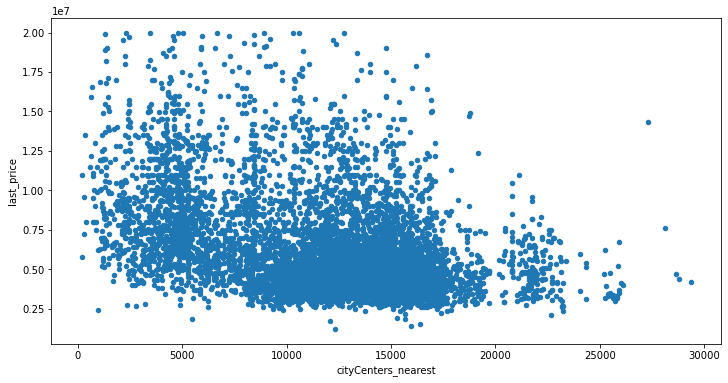

In [128]:
spb_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(12,6));

In [101]:
print('Коэффициент корреляции между ценой и удаленностью от центра в Санкт-Петербурге: {:.2f}'.format(spb_data['last_price'].corr(spb_data['cityCenters_nearest'])))

Коэффициент корреляции между ценой и удаленностью от центра в Санкт-Петербурге: -0.41


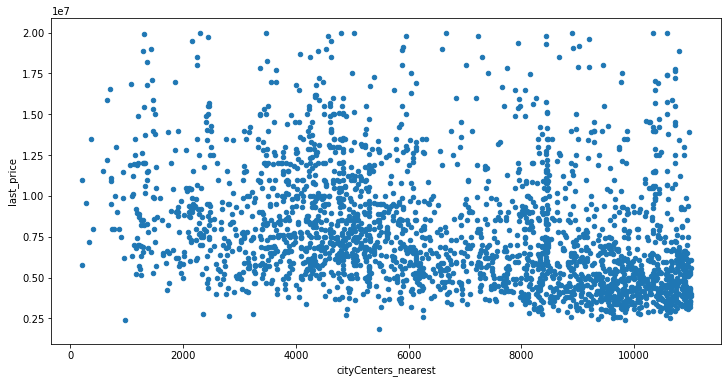

In [129]:
spb_center_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter',
                     figsize=(12,6));

In [103]:
print('Коэффициент корреляции между ценой и удаленностью от центра в центральной зоне Санкт-Петербурга: {:.2f}'.format(spb_center_data['last_price'].corr(spb_data['cityCenters_nearest'])))

Коэффициент корреляции между ценой и удаленностью от центра в центральной зоне Санкт-Петербурга: -0.33


Между расстоянием от центра и ценой нет чёткой зависимости. Хотя в центре основное "облако" точек всё-таки снижается, к тому же на графике, где цена была [агрегирована по километру](#km), была явно видна нисходящая тенденция.

Рассмотрим зависимость цены от даты размещения объявления.

In [104]:
pivot_weekday_spb = spb_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
pivot_weekday_spb_center = spb_center_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

In [105]:
weekday_pivots = pd.concat([pivot_weekday_spb, pivot_weekday_spb_center], axis=1)
weekday_pivots.columns = ['Цена по дням недели, Санкт-Петербург', 'Цена по дням недели, центр']
weekday_pivots

,"Цена по дням недели, Санкт-Петербург","Цена по дням недели, центр"
weekday_exposition,,
0,5300000.0,6950000.0
1,5400000.0,6860000.0
2,5300000.0,6700000.0
3,5500000.0,7200000.0
4,5300000.0,6900000.0
5,5290000.0,6475000.0
6,5175000.0,6799000.0


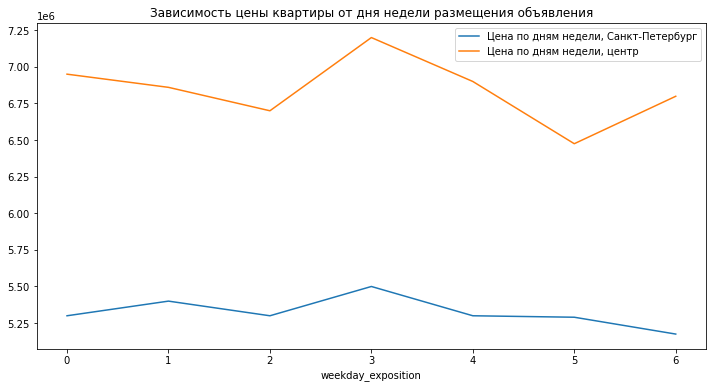

In [130]:
weekday_pivots.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры от дня недели размещения объявления');

В Санкт-Петербурге и в центре в среднем цена квартир в среду выше. Объявления с минимальной медианной ценой опубликованы в центре - в пятницу, в городе - в субботу.

In [107]:
pivot_month_spb = spb_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
pivot_month_spb_center = spb_center_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')

In [108]:
month_pivots = pd.concat([pivot_month_spb, pivot_month_spb_center], axis=1)
month_pivots.columns = ['Цена по месяцам, Санкт-Петербург', 'Цена по месяцам, центр']
month_pivots

,"Цена по месяцам, Санкт-Петербург","Цена по месяцам, центр"
month_exposition,,
1,5500000.0,7000000.0
2,5300000.0,6600000.0
3,5150000.0,6590000.0
4,5300000.0,6570000.0
5,5585000.0,7066624.0
6,5350000.0,6925000.0
7,5300000.0,7300000.0
8,5350000.0,6870000.0
9,5500000.0,7600000.0


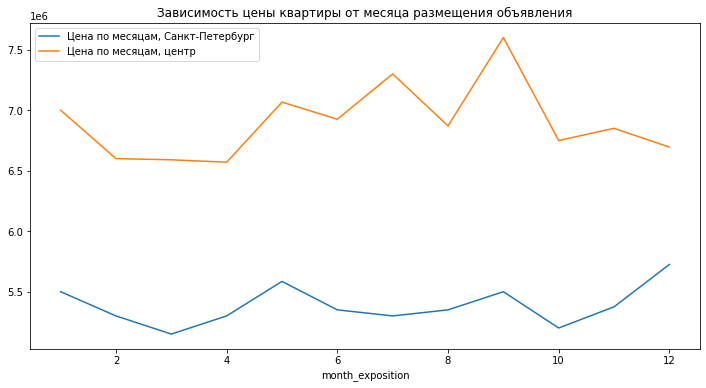

In [131]:
month_pivots.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры от месяца размещения объявления');

В Санкт-Петербурге объявления с большей ценой публикуют в мае, в центре - в сентябре. Объявления с минимальной медианной ценой опубликованы в центре - в апреле, в городе - в марте.

In [110]:
pivot_year_spb = spb_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
pivot_year_spb_center = spb_center_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')

In [111]:
year_pivots = pd.concat([pivot_year_spb, pivot_year_spb_center], axis=1)
year_pivots.columns = ['Цена по годам, Санкт-Петербург', 'Цена по годам, центр']
year_pivots

,"Цена по годам, Санкт-Петербург","Цена по годам, центр"
year_exposition,,
2014,8681628.0,8889000.0
2015,5951522.0,7445000.0
2016,5500000.0,7465000.0
2017,5300000.0,6990000.0
2018,5200000.0,6550000.0
2019,5500000.0,6400000.0


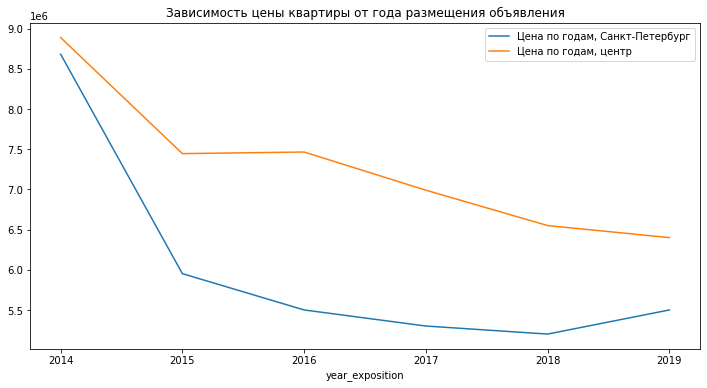

In [132]:
year_pivots.plot(figsize=(12,6))
plt.title('Зависимость цены квартиры от года размещения объявления');

Цены в центре города с 2014 по 2019 год снизились меньше, чем по городу в целом.

## 5. Общий вывод

В результате исследования была выявлена зависимость цены объектов недвижимости от следующих факторов:  
 - Между **общей площадью** и ценой квартиры выявлена положительная линейная взаимосвязь. Коэффициент корреляции Пирсона между эими переменными равен 0.77  
 - Минимальная и медианная цена с увеличением **числа комнат** растут. У квартир, имеющих больше четырех комнат, минимальная цена возрастает сильнее, а максимальная цена уменьшается. Эта тенденция сохраняется как на уровне региона, так и на уровне Санкт-Петербурга в целом и его центральной зоны  
 - Квартиры **на первом и последнем этаже** в целом стоят дешевле. Но в центральной зоне разница в ценах между квартирами на последнем этаже и на других этажах выражена меньше  
 - Самая высокая стоимость квадратного метра среди топ 10 населённых пунктов по числу объявлений - в посёлке Парголово, самая низкая - в Гатчине 
 - Зависимость между **датой публикации объявления** и медианной ценой квартир следующая:
 


Зависимость цены от месяца публикации объявления:

In [113]:
pd.DataFrame(data=[['апрель','сентябрь'],['март','май'],['март','сентябрь']], index=['Центральная зона','Санкт-Петербург','Регион'],columns=['Минимальная цена','Максимальная цена'])

,Минимальная цена,Максимальная цена
Центральная зона,апрель,сентябрь
Санкт-Петербург,март,май
Регион,март,сентябрь


Зависимость цены от дня недели публикации объявления:

In [114]:
pd.DataFrame(data=[['пятница','среда'],['суббота','среда'],['четверг','понедельник']], index=['Центральная зона','Санкт-Петербург','Регион'],columns=['Минимальная цена','Максимальная цена'])

,Минимальная цена,Максимальная цена
Центральная зона,пятница,среда
Санкт-Петербург,суббота,среда
Регион,четверг,понедельник


С 2014 по 2019 год цены на недвижимость в целом снижались. В центральной зоне падение цен выражено меньше.

[К содержанию](#Содержание)